In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sympy import *

In [12]:
def f1(x,y):
    return 2*x**2-1.05*x**4+(1/6)*x**6+x*y+y**2

In [13]:
x = np.linspace(-10,10,2000)
y = np.linspace(-10,10,2000)
X,Y = np.meshgrid(x,y)
Z = f1(X,Y)

In [14]:
x, y = symbols('x y')
eq=2*x**2-1.05*x**4+(1/6)*x**6+x*y+y**2

In [15]:
def f(x,y):
    return 2*x**2-1.05*x**4+(1/6)*x**6+x*y+y**2

In [16]:
def SGD_grad(X, Y):
    v = list(ordered(eq.free_symbols))
    gradient = lambda f, v: Matrix([f]).jacobian(v)
    subs_grad=gradient(eq, v).subs([(x,X),(y,Y)]).evalf()
    return np.array(subs_grad).astype(np.float64)[0]

In [17]:
def stochastic_gradient_descent(max_epochs, xy_start, obj_func, grad_func):
    
    xy = xy_start
    xy_history = xy_start
    f_history = obj_func(*xy_start)
    delta_xy = np.zeros(xy_start.shape)
    i = 0
    diff = 1
    l_rate=0.01
    while  i < max_epochs and diff > 1e-8:
        
        choose_var = np.random.randint(xy_start.shape[0])
        grad = np.zeros(shape = xy_start.shape[0])
        grad[choose_var] = grad_func(*xy)[choose_var]
        delta_xy = -l_rate*np.array(grad) + 0.6*delta_xy
        xy = xy+delta_xy
            
        i += 1
        xy_history = np.vstack((xy_history,xy))
        f_history = np.vstack((f_history,obj_func(*xy)))
        diff = np.absolute(f_history[-1]-f_history[-2])
    return xy_history, f_history

In [18]:
opt_res,f_opt = stochastic_gradient_descent(max_epochs = 500,xy_start = np.array([2.5,2.5]),
                                          obj_func = f,grad_func = SGD_grad)

opt_res,f_opt

(array([[ 2.50000000e+00,  2.50000000e+00],
        [ 2.05468750e+00,  2.50000000e+00],
        [ 1.67842663e+00,  2.50000000e+00],
        [ 1.42592026e+00,  2.50000000e+00],
        [ 1.27441644e+00,  2.43574080e+00],
        [ 1.16149599e+00,  2.39718528e+00],
        [ 1.06798442e+00,  2.37405196e+00],
        [ 1.01187748e+00,  2.30201109e+00],
        [ 9.78213321e-01,  2.20262757e+00],
        [ 9.27217156e-01,  2.14299746e+00],
        [ 8.64728011e-01,  2.10721939e+00],
        [ 8.27234524e-01,  2.03496089e+00],
        [ 8.04738431e-01,  1.94263422e+00],
        [ 7.91240776e-01,  1.84033815e+00],
        [ 7.50793235e-01,  1.77896051e+00],
        [ 7.26524711e-01,  1.69904678e+00],
        [ 6.79994420e-01,  1.65109854e+00],
        [ 6.52076246e-01,  1.58250769e+00],
        [ 6.35325342e-01,  1.50318226e+00],
        [ 5.94565415e-01,  1.45558700e+00],
        [ 5.70109458e-01,  1.39197245e+00],
        [ 5.25892100e-01,  1.35380372e+00],
        [ 4.99361684e-01,  1.298

In [19]:
opt_res[-1]# Итоговая точка

array([-0.00026918,  0.00057736])

<IPython.core.display.Javascript object>


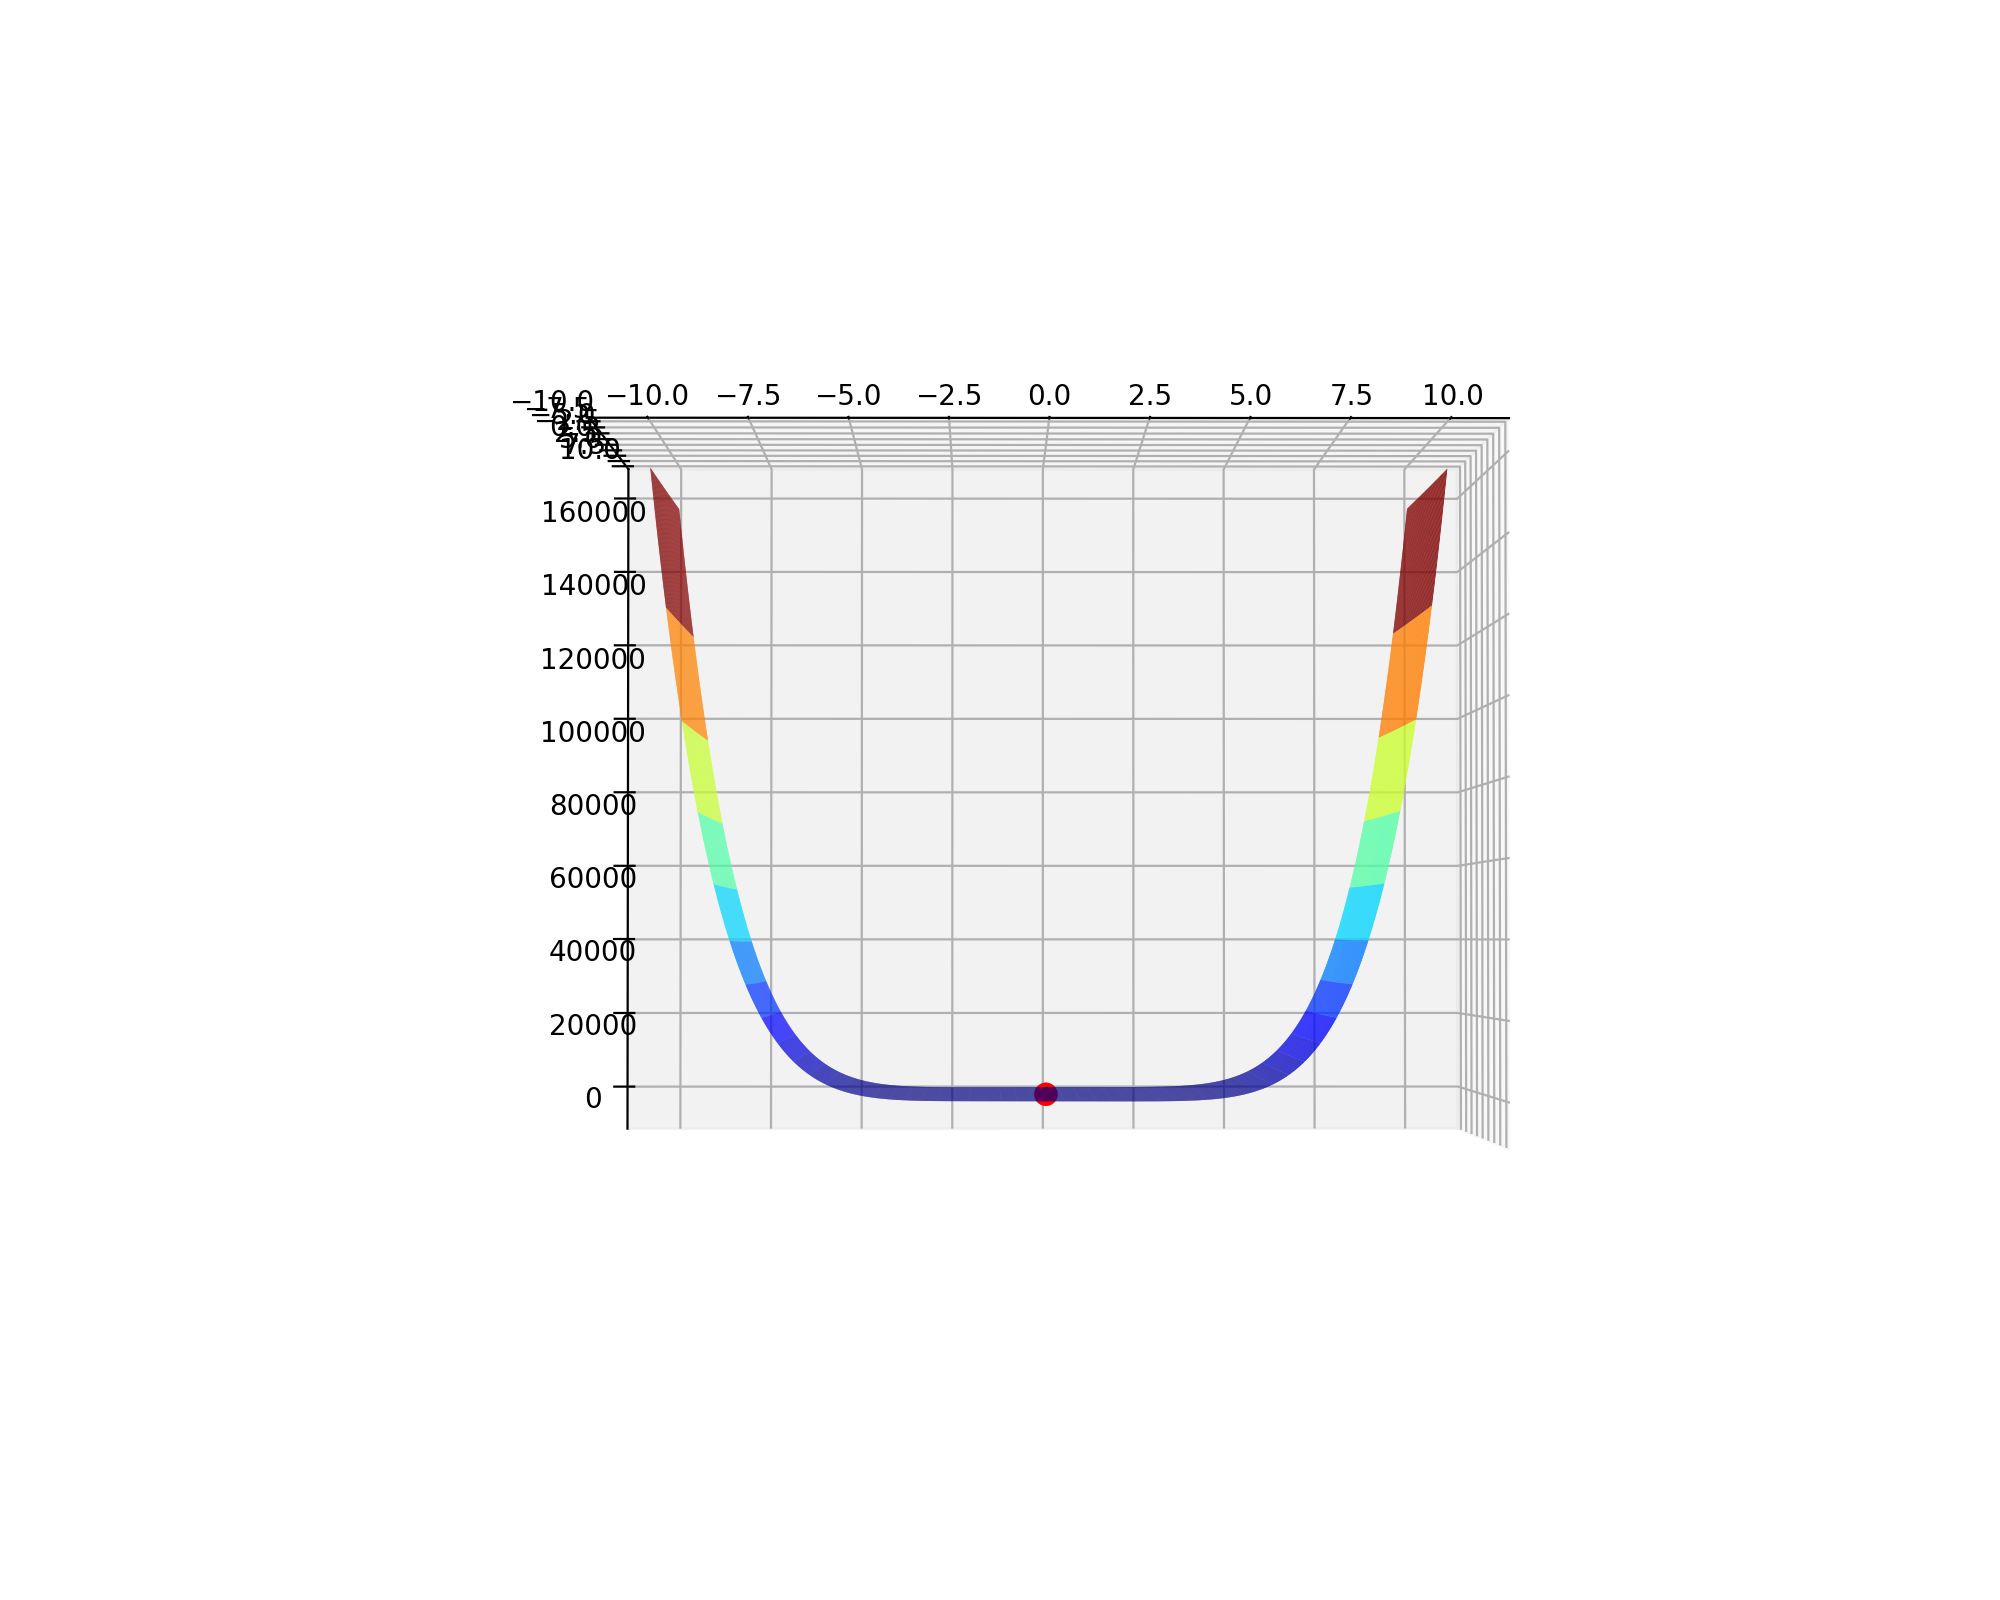

In [21]:
# отметим точку на графике
%matplotlib notebook
x = np.linspace(-10,10,2000)
y = np.linspace(-10,10,2000)
X,Y = np.meshgrid(x,y)
Z = f1(X,Y)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z,cmap='jet')
ax.scatter(opt_res[-1],opt_res[-1],-1,facecolor ='red',s=55)